# Práctica 6 Parte III. Reducción de la dimensionalidad

Vamos a ver cómo funciona el algoritmo de PCA utilizado un dataset muy conocido en el mundo del aprendizaje automático: el dataset de los dígitos. 

El dataset de los dígitos está compuesto por 1797 imágenes de dígitos manuscritos de tamaño 8x8. Este dataset se utiliza normalmente para algoritmos de clasificación (que veremos más adelante), pero también es un buen ejemplo para ver los algoritmos de clustering y de reducción de dimensionalidad. 

Cada dígito viene representado por un vector de 64 componentes que corresponden a los valores de cada pixel del dígito. Para más información sobre este dataset ver: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html.

En esta parte de la práctica compararemos los resultados que se obtienen utilizando K-means y K-means combinado con PCA. Para ello empezamos cargando las librerías necesarias. 

In [0]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Fijamos la semilla para obtener siempre los mismos resultados.

In [0]:
np.random.seed(42)

Cargamos el dataset de los dígitos.

In [0]:
digits = load_digits()

Obtenemos los descriptores de las instancias y estandarizamos (veremos en qué consiste este proceso más adelante) el dataset.

In [0]:
data = scale(digits.data)

In [0]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

Mostramos el número de instancias del dataset y el número de descriptores.

In [0]:
n_instancias, n_descriptores = data.shape
print("n_instancias %d, n_descriptores %d" % (n_instancias, n_descriptores))

n_instancias 1797, n_descriptores 64


Construimos el estimador K-means. Tenemos 10 clusters ya que de antemano sabemos que hay 10 posibles dígitos y por lo tanto 10 posibles grupos.

In [0]:
estimator = KMeans(n_clusters=10)

Realizamos la agrupación por clusters y mostramos el tiempo necesario

In [0]:
%%time 
estimator.fit(data)

CPU times: user 324 ms, sys: 188 ms, total: 511 ms
Wall time: 268 ms


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Ahora definimos una función que nos indica para cada clase la distribución en clusters. Notad que los clusters no están ordenados.

In [0]:
def valida_digits(etiquetas_esperadas, etiquetas_obtenidas):
    for i in range(0,10):
        res = np.zeros(10).astype("uint8")
        for j,etiqueta in enumerate(etiquetas_esperadas):
            if(etiqueta==i):
                res[etiquetas_obtenidas[j]]+=1
        print("Dígito " + str(i) + ": ")
        print(res)

Mostramos la distribución de los dígitos.

In [0]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[177   0   0   0   1   0   0   0   0   0]
Dígito 1: 
[ 0  0  0 96  1  0 27  0  0 58]
Dígito 2: 
[ 0  0  2 34  0  0 48  6 82  5]
Dígito 3: 
[  0   0   8   9   0   0   1 152  13   0]
Dígito 4: 
[  0   0   4   3 157   9   0   0   0   8]
Dígito 5: 
[ 0  2  2 59  2  0  0 72 43  2]
Dígito 6: 
[  1 175   0   4   0   0   0   0   0   1]
Dígito 7: 
[  0   0 150   0   0  18   0   0   8   3]
Dígito 8: 
[ 0  3  2 99  0  0  0 46  9 15]
Dígito 9: 
[  0   0   8   5   0   3   0 145   0  19]


Repetimos el proceso pero esta vez aplicando el algoritmo de PCA tomando 20 componentes principales

In [0]:
%%time 
pca = PCA(n_components=20).fit(data)
data_r = pca.transform(data)
estimator = KMeans(n_clusters=10)
estimator.fit(data_r)

CPU times: user 273 ms, sys: 281 ms, total: 554 ms
Wall time: 291 ms


In [0]:
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0 177   0   0   0   0   1   0   0]
Dígito 1: 
[58  0  0 96  0  0 27  0  0  1]
Dígito 2: 
[ 6 78  0 36  0  0 51  0  4  2]
Dígito 3: 
[  0  13   0   8   0   0   2   0 151   9]
Dígito 4: 
[  7   0   0   4   9   0   0 157   0   4]
Dígito 5: 
[ 2 42  0 61  0  3  0  2 70  2]
Dígito 6: 
[  1   0   1   4   0 172   3   0   0   0]
Dígito 7: 
[  3   8   0   0  17   0   0   1   0 150]
Dígito 8: 
[16  8  0 97  0  3  0  0 47  3]
Dígito 9: 
[ 19   0   0   4   3   0   3   0 142   9]


***
## Ejercicio 
Compara los resultados tanto en tiempo, como en distribución de los clusters utilizando PCA y sin utilizarlo.

In [0]:
%%time 
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0 177   0   0   0   0   0   1   0]
Dígito 1: 
[ 0  0  0 58 97  0  0 27  0  0]
Dígito 2: 
[ 0  4  0  4 35  3 78 53  0  0]
Dígito 3: 
[  0 159   0   0   6  10   6   2   0   0]
Dígito 4: 
[  0   0   0   6   3   4   1   0 157  10]
Dígito 5: 
[ 4 76  0  3 20  5 70  0  4  0]
Dígito 6: 
[174   0   1   1   5   0   0   0   0   0]
Dígito 7: 
[  0   0   0   3   1 149   8   0   1  17]
Dígito 8: 
[ 3 45  0 16 94  4 12  0  0  0]
Dígito 9: 
[  0 142   0  19   3   9   1   3   0   3]
CPU times: user 15.4 ms, sys: 4.22 ms, total: 19.6 ms
Wall time: 30.4 ms


In [0]:
pca = PCA(n_components=20).fit(data)
data_r = pca.transform(data)
estimator = KMeans(n_clusters=10)
estimator.fit(data_r)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
%%time 
valida_digits(digits.target,estimator.labels_)

Dígito 0: 
[  0   0 177   0   0   0   0   0   1   0]
Dígito 1: 
[ 0  0  0 58 97  0  0 27  0  0]
Dígito 2: 
[ 0  4  0  4 35  3 78 53  0  0]
Dígito 3: 
[  0 159   0   0   6  10   6   2   0   0]
Dígito 4: 
[  0   0   0   6   3   4   1   0 157  10]
Dígito 5: 
[ 4 76  0  3 20  5 70  0  4  0]
Dígito 6: 
[174   0   1   1   5   0   0   0   0   0]
Dígito 7: 
[  0   0   0   3   1 149   8   0   1  17]
Dígito 8: 
[ 3 45  0 16 94  4 12  0  0  0]
Dígito 9: 
[  0 142   0  19   3   9   1   3   0   3]
CPU times: user 15.5 ms, sys: 1.56 ms, total: 17 ms
Wall time: 20.6 ms


***

Utilizando los siguientes comandos podemos ver el porcentaje de varianza explicado por cada una de las componentes de PCA y el total.

In [0]:
print(pca.explained_variance_ratio_)
print("Varianza total: " + str(100*np.sum(pca.explained_variance_ratio_))+ "%")

[0.12033916 0.09561054 0.08444415 0.06498408 0.04860155 0.0421412
 0.03942082 0.0338938  0.02998212 0.02931987 0.02781801 0.02577005
 0.02275247 0.02227142 0.02165047 0.01914085 0.01775405 0.01636166
 0.01595909 0.01488388]
Varianza total: 79.30992470956124%


La siguiente función nos genera un gráfico mostrando la varianza acumulada y la varianza individual que se obtiene al considerar distintos valores como componentes principales (en concreto va tomando valores entre 1 y el número de descriptores). Además esta función muestra la varianza total para cada caso.

In [0]:
def drawVarianza(data):
    pcas = [PCA(n_components=k).fit(data) for k in range(1,len(data[0]))]
    var = [pca.explained_variance_ratio_[-1] for pca in pcas]
    varianzas = [np.sum(pca.explained_variance_ratio_) for pca in pcas]
    for k in range(1,len(data[0])):
        print("Varianza total (%s componentes): %s" % (k,str(100 * varianzas[k-1])))
    plt.clf()

    plt.step(range(1,len(data[0])),varianzas,where='mid',label='varianza acumulada')
    plt.bar(range(1,len(data[0])),var,alpha=0.5,align='center',label='varianza individual')
    plt.xlabel('Componentes principales')
    plt.ylabel('Ratio de varianza explicada')
    plt.show()

Varianza total (1 componentes): 12.033916084274178
Varianza total (2 componentes): 21.594970458873853
Varianza total (3 componentes): 30.03938537923272
Varianza total (4 componentes): 36.537793249128015
Varianza total (5 componentes): 41.39794771048921
Varianza total (6 componentes): 45.6120570081848
Varianza total (7 componentes): 49.55156682753874
Varianza total (8 componentes): 52.939986886127556
Varianza total (9 componentes): 55.93668776836248
Varianza total (10 componentes): 58.863674498688646
Varianza total (11 componentes): 61.651620484776835
Varianza total (12 componentes): 64.23022624256984
Varianza total (13 componentes): 66.50582797862162
Varianza total (14 componentes): 68.73319060296406
Varianza total (15 componentes): 70.89824570271456
Varianza total (16 componentes): 72.81339336979941
Varianza total (17 componentes): 74.58289656905067
Varianza total (18 componentes): 76.22519455634607
Varianza total (19 componentes): 77.81941997896728
Varianza total (20 componentes): 79

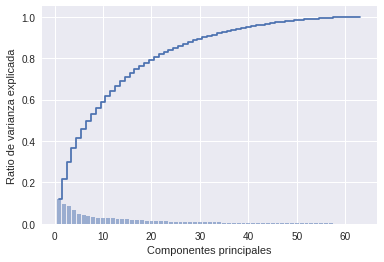

In [0]:
drawVarianza(data)

*** 
## Ejercicio
En clase hemos visto que para elegir el número de componentes k, debemos tomar el menor k tal que la varianza total sea mayor que el 99%. En nuestro caso, ¿qué valor deberíamos tomar?

54 componentes

***

## Ejercicio adicional
Recupera los ficheros de la práctica 5 y repite el análisis hecho para el dataset de los dígitos, pero esta vez utilizando el dataset iris.csv.


In [0]:
!wget https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv -O iris.csv
import pandas as pd

--2019-03-20 19:37:08--  https://raw.githubusercontent.com/IA1819/Datasets/master/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4606 (4.5K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   4.50K  --.-KB/s    in 0s      

2019-03-20 19:37:08 (83.3 MB/s) - ‘iris.csv’ saved [4606/4606]



In [0]:
df = pd.read_csv('iris.csv')
X = df.iloc[:,:-1]

In [0]:
estimator.fit(X)
n_instancias, n_descriptores = X.shape
print("n_instancias %d, n_descriptores %d" % (n_instancias, n_descriptores))

n_instancias 150, n_descriptores 4


In [0]:
estimator = KMeans(n_clusters=10)
estimator.fit(X.values)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [0]:
def valida_digits(etiquetas_esperadas, etiquetas_obtenidas):
    for i in range(0,10):
        res = np.zeros(10).astype("uint8")
        for j,etiqueta in enumerate(etiquetas_esperadas):
            if(etiqueta==i):
                res[etiquetas_obtenidas[j]]+=1
        print("Dígito " + str(i) + ": ")
        print(res)

## Entrega

Recuerda guardar tus cambios en tu repositorio utilizando la opción "Save a copy in GitHub..." del menú File.